# Simple Betting Strategy

This notebook introduces the baseline betting model and the simple (flat) betting strategy, in which the bettor wagers the same fixed stake every round.

Here a roulette-like game will be used with only a slight house edge (win probability 49%), simulating both:

- A single bettor path, showing bankroll evolution over time
- A Monte Carlo simulation with many bettors, showing the distribution of outcomes and probability of going broke

In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt

from ..src.rng import roulette_like_trial
from ..src.strategies.simple import simple_bettor
from ..src.runner import run_simulation

plt.style.use("seaborn-v0_8-darkgrid")
random.seed(42)

## 1. Simulation Parameters

Begin by setting simple parameters for a single betting path.

In [5]:
initial_funds = 10_000
stake = 100
n_rounds = 1000
p_win = 0.49 

## 2. Single Bettor Path

One bettor can be run with their bankroll visualised over time.

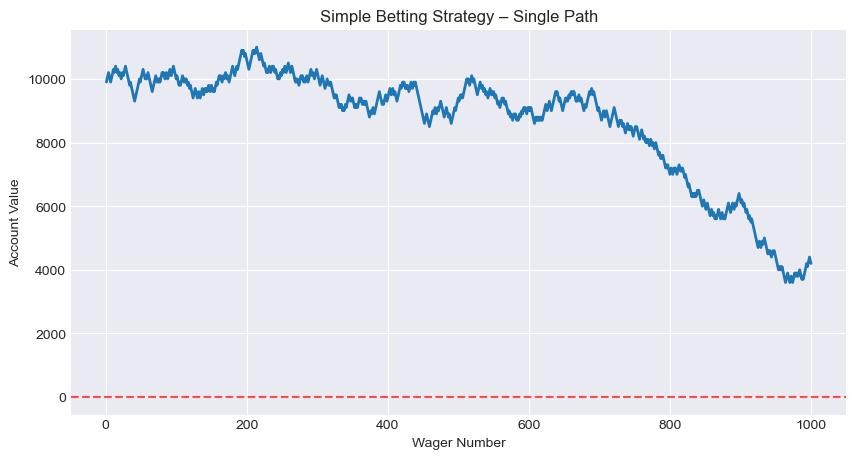

In [24]:
random.seed(42)

def trial():
    return roulette_like_trial(0.49)

wagers, values = simple_bettor(
    initial_funds=initial_funds,
    stake=stake,
    n_rounds=n_rounds,
    rng_fn=trial
)

plt.figure(figsize=(10,5))
plt.plot(wagers, values, linewidth=2)
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.xlabel("Wager Number")
plt.ylabel("Account Value")
plt.title("Simple Betting Strategy – Single Path")
plt.show()

## 3. Monte Carlo Simulation Over Many Bettors

Now many independent bettors can be simulated using the same strategy and parameters. This allowes for the following estimates:

- The probability of going broke
- The mean and median final bankroll
- The shape of the distribution of outcomes


In [28]:
n_bettors = 1000

final_values, broke_count = run_simulation(
    simple_bettor,
    initial_funds,
    stake,
    n_rounds,
    n_bettors=500,
    p_win=0.49,
    seed=42,
)

print("Bettors who went broke: " + str(broke_count))
print("Broke rate: " + str(round(broke_count / n_bettors * 100, 2)) + " %")

mean_value = np.mean(final_values)
median_value = np.median(final_values)

print("Mean final wealth: " + str(round(mean_value, 2)))
print("Median final wealth: " + str(round(median_value, 2)))

Bettors who went broke: 7
Broke rate: 0.7 %
Mean final wealth: 7861.6
Median final wealth: 7800.0


## 4. Histogram of Final Wealth

A visualisation of the distribution of final bankrolls from the Monte Carlo experiment.

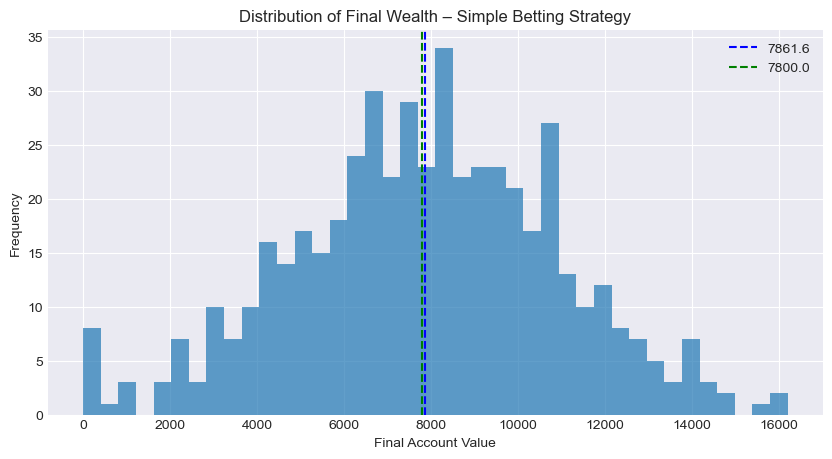

In [27]:
plt.figure(figsize = (10,5))
plt.hist(final_values, bins = 40, alpha=0.7)
plt.axvline(mean_value, color="blue", linestyle="--", label=str(round(mean_value, 2)))
plt.axvline(median_value, color="green", linestyle="--", label=str(round(median_value, 2)))
plt.title("Distribution of Final Wealth – Simple Betting Strategy")
plt.xlabel("Final Account Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Summary

- Flat betting keeps stake size constant.
- In a game with a slight house edge, the long-term expectation is negative.
- The distribution of outcomes increases as rounds and number of bettors increase.
- The Monte Carlo simulation shows that a non-trivial number of bettors are ruined.

This notebook sets the foundation for comparing more complex strategies (Martingale, D’Alembert, Multipliers) in the following notebooks.